<a href="https://colab.research.google.com/github/Baimiyk/2025_VisiKomputer_TI2C/blob/main/jobsheet02_klasifikasi_gambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum **1**

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


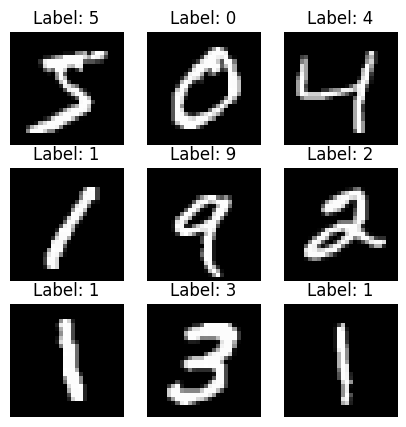

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Memuat data dari tensorflow.keras.datasets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Menampilkan 9 contoh gambar pertama dari dataset
plt.figure(figsize=(5,5))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

tugas kecil

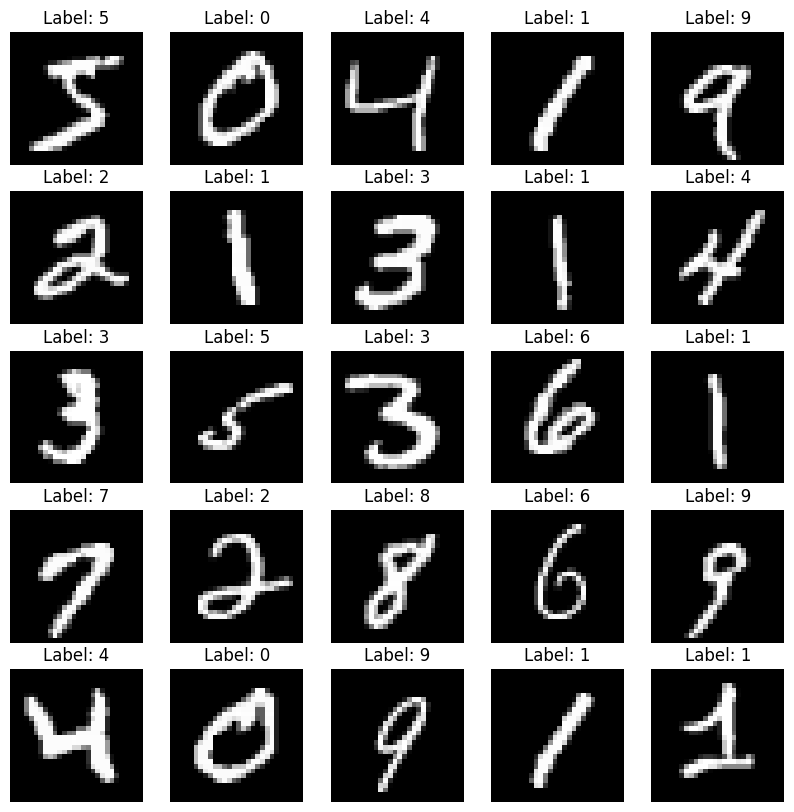

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Memuat data dari tensorflow.keras.datasets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Menampilkan 9 contoh gambar pertama dari dataset
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

# Prakitum 2

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# 1. Meratakan (flatten) gambar dari 28x28 menjadi vektor 784
#    dan normalisasi data
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# 2. Membuat model SVM
# kernel='linear' berarti kita menggunakan model linier
clf = svm.SVC(kernel='linear', gamma='scale')

# 3. Melatih model hanya dengan 5000 data pertama karena SVM berat secara komputasi
print("Melatih model SVM...")
clf.fit(x_train_flat[:5000], y_train[:5000])
print("Pelatihan selesai.")

# 4. Membuat prediksi pada data uji
y_pred = clf.predict(x_test_flat)

# 5. Menampilkan akurasi
print(f"Akurasi SVM: {accuracy_score(y_test, y_pred)}")

Melatih model SVM...
Pelatihan selesai.
Akurasi SVM: 0.9101


tugas kecil


In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# 1. Meratakan (flatten) gambar dari 28x28 menjadi vektor 784
#    dan normalisasi data
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# 2. Membuat model SVM
# kernel='linear' berarti kita menggunakan model linier
clf = svm.SVC(kernel='rbf', gamma='scale')

# 3. Melatih model hanya dengan 5000 data pertama karena SVM berat secara komputasi
print("Melatih model SVM...")
clf.fit(x_train_flat[:5000], y_train[:5000])
print("Pelatihan selesai.")

# 4. Membuat prediksi pada data uji
y_pred = clf.predict(x_test_flat)

# 5. Menampilkan akurasi
print(f"Akurasi SVM: {accuracy_score(y_test, y_pred)}")

Melatih model SVM...
Pelatihan selesai.
Akurasi SVM: 0.9513


# Praktikum 3

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Melatih model CNN...
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8995 - loss: 0.3407 - val_accuracy: 0.9822 - val_loss: 0.0644
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9811 - loss: 0.0609 - val_accuracy: 0.9848 - val_loss: 0.0512
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.9892 - loss: 0.0367 - val_accuracy: 0.9848 - val_loss: 0.0540
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9910 - loss: 0.0286 - val_accuracy: 0.9873 - val_loss: 0.0536
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.9938 - loss: 0.0190 - val_accuracy: 0.9888 - val_loss: 0.0518
Pelatihan selesai.


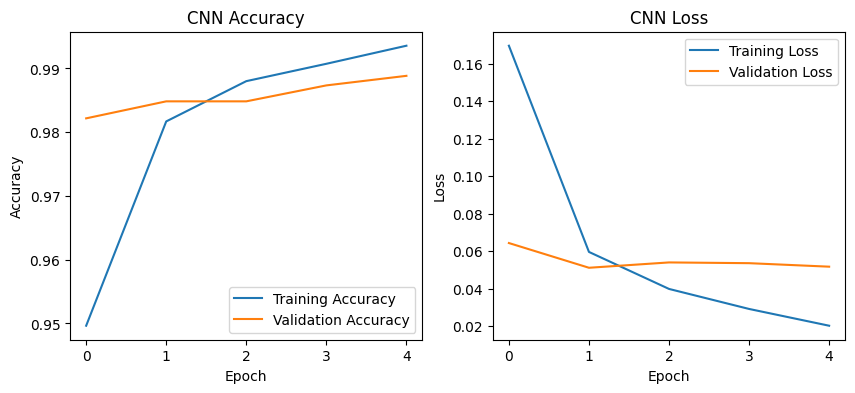

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# 1. Normalisasi dan reshape data agar sesuai dengan input CNN
#    [samples, height, width, channels]
x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1) / 255.0

# 2. Membangun arsitektur model CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') # 10 output untuk 10 kelas angka (0-9)
])

# 3. Mengompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. Melatih model
print("Melatih model CNN...")
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)
print("Pelatihan selesai.")

# 5. Plot history akurasi dan loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

tugas kecil

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Melatih model CNN...
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 53s 30ms/step - accuracy: 0.8920 - loss: 0.3504 - val_accuracy: 0.9837 - val_loss: 0.0561
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 49s 29ms/step - accuracy: 0.9828 - loss: 0.0537 - val_accuracy: 0.9897 - val_loss: 0.0395
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 48s 29ms/step - accuracy: 0.9899 - loss: 0.0318 - val_accuracy: 0.9858 - val_loss: 0.0545
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.9934 - loss: 0.0211 - val_accuracy: 0.9890 - val_loss: 0.0375
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9941 - loss: 0.0173 - val_accuracy: 0.9902 - val_loss: 0.0377
Pelatihan selesai.


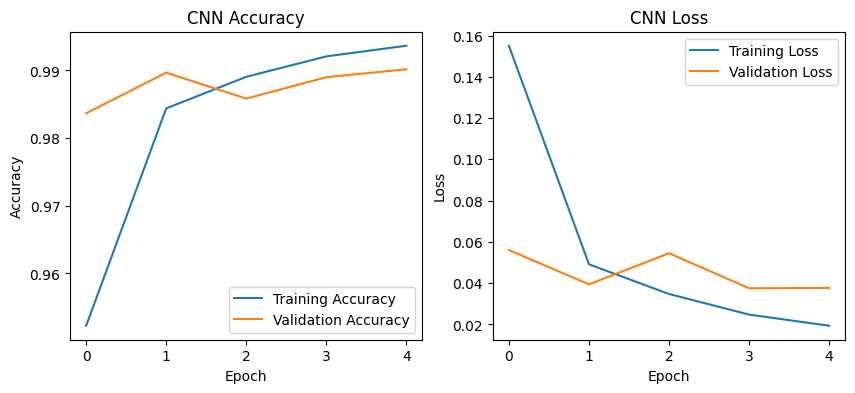

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# 1. Normalisasi dan reshape data agar sesuai dengan input CNN
#    [samples, height, width, channels]
x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1) / 255.0

# 2. Membangun arsitektur model CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') # 10 output untuk 10 kelas angka (0-9)
])

# 3. Mengompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. Melatih model
print("Melatih model CNN...")
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)
print("Pelatihan selesai.")

# 5. Plot history akurasi dan loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Praktikum 4

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
Melatih model CNN pada CIFAR-10...
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 58s 40ms/step - accuracy: 0.3856 - loss: 1.6793 - val_accuracy: 0.5822 - val_loss: 1.2035
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 54s 38ms/step - accuracy: 0.5990 - loss: 1.1483 - val_accuracy: 0.6484 - val_loss: 1.0340
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 53s 38ms/step - accuracy: 0.6554 - loss: 0.9846 - val_accuracy: 0.6704 - val_loss: 0.9609
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 52s 37ms/step - accuracy: 0.6884 - loss: 0.8966 - val_accuracy: 0.6898 - val_loss: 0.9312
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 52s 37ms/step - accuracy: 0.7167 - loss: 0.8239 - val_accuracy: 0.6912 - val_loss: 0.9401
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 53s 38ms/step - accuracy: 0.7362 - loss: 0.7606 - val_accuracy: 0.7050 - val_loss: 0.8837
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.7592 - loss: 0.6966 - val_accuracy: 0.6964 - val_l

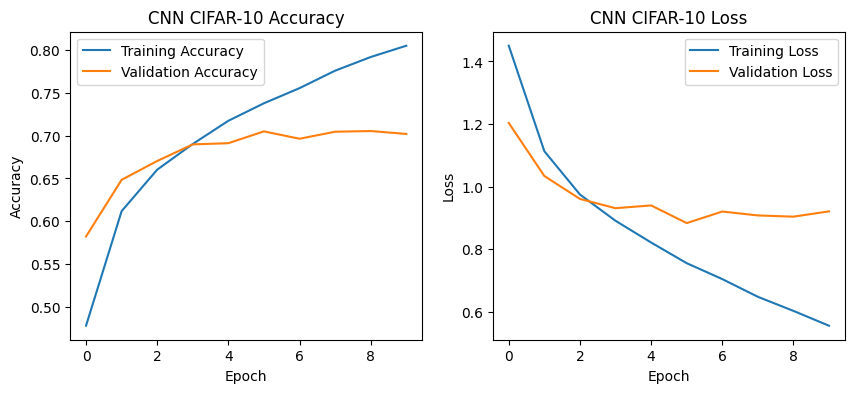

In [ ]:
from tensorflow.keras.datasets import cifar10

# 1. Memuat dan normalisasi dataset CIFAR-10
(x_train_c, y_train_c), (x_test_c, y_test_c) = cifar10.load_data()
x_train_c, x_test_c = x_train_c / 255.0, x_test_c / 255.0

# 2. Membangun arsitektur CNN yang lebih dalam
model_cifar = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 3. Kompilasi model
model_cifar.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

# 4. Melatih model
print("Melatih model CNN pada CIFAR-10...")
history_cifar = model_cifar.fit(x_train_c, y_train_c, epochs=10, validation_split=0.1)
print("Pelatihan selesai.")

# 5. Plot history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_cifar.history['accuracy'], label='Training Accuracy')
plt.plot(history_cifar.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_cifar.history['loss'], label='Training Loss')
plt.plot(history_cifar.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

tugas kecil

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
Melatih model CNN pada CIFAR-10...
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 64s 44ms/step - accuracy: 0.2826 - loss: 1.9247 - val_accuracy: 0.5112 - val_loss: 1.3721
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 58s 41ms/step - accuracy: 0.4686 - loss: 1.4684 - val_accuracy: 0.5772 - val_loss: 1.1956
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 72s 51ms/step - accuracy: 0.5240 - loss: 1.3257 - val_accuracy: 0.5832 - val_loss: 1.1607
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 67s 41ms/step - accuracy: 0.5549 - loss: 1.2361 - val_accuracy: 0.6304 - val_loss: 1.0406
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 59s 42ms/step - accuracy: 0.5860 - loss: 1.1630 - val_accuracy: 0.6644 - val_loss: 0.9591
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 58s 41ms/step - accuracy: 0.6023 - loss: 1.1121 - val_accuracy: 0.6540 - val_loss: 0.9695
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.6191 - loss: 1.0641 - val_accuracy: 0.6762 - val_

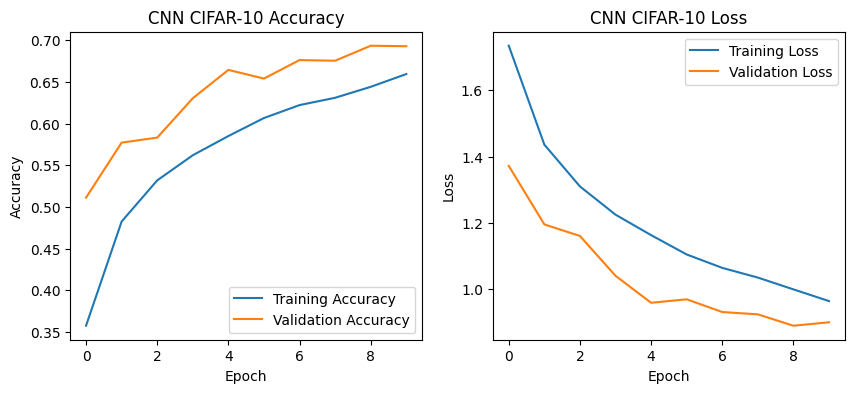

In [ ]:
from tensorflow.keras.datasets import cifar10

# 1. Memuat dan normalisasi dataset CIFAR-10
(x_train_c, y_train_c), (x_test_c, y_test_c) = cifar10.load_data()
x_train_c, x_test_c = x_train_c / 255.0, x_test_c / 255.0

# 2. Membangun arsitektur CNN yang lebih dalam
model_cifar = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# 3. Kompilasi model
model_cifar.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

# 4. Melatih model
print("Melatih model CNN pada CIFAR-10...")
history_cifar = model_cifar.fit(x_train_c, y_train_c, epochs=10, validation_split=0.1)
print("Pelatihan selesai.")

# 5. Plot history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_cifar.history['accuracy'], label='Training Accuracy')
plt.plot(history_cifar.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_cifar.history['loss'], label='Training Loss')
plt.plot(history_cifar.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Praktikum 5

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Melatih model dengan Transfer Learning...
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 569s 403ms/step - accuracy: 0.4569 - loss: 1.5603 - val_accuracy: 0.5800 - val_loss: 1.2171
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 521s 370ms/step - accuracy: 0.5769 - loss: 1.2106 - val_accuracy: 0.5802 - val_loss: 1.1956
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 559s 368ms/step - accuracy: 0.5990 - loss: 1.1413 - val_accuracy: 0.6008 - val_loss: 1.1448
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 552s 393ms/step - accuracy: 0.6117 - loss: 1.1023 - val_accuracy: 0.5980 - val_loss: 1.1464
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 550s 391ms/step - accuracy: 0.6246 - loss: 1.0682 - val_accuracy: 0.6092 - val_loss: 1.1099
Pelatihan selesai.


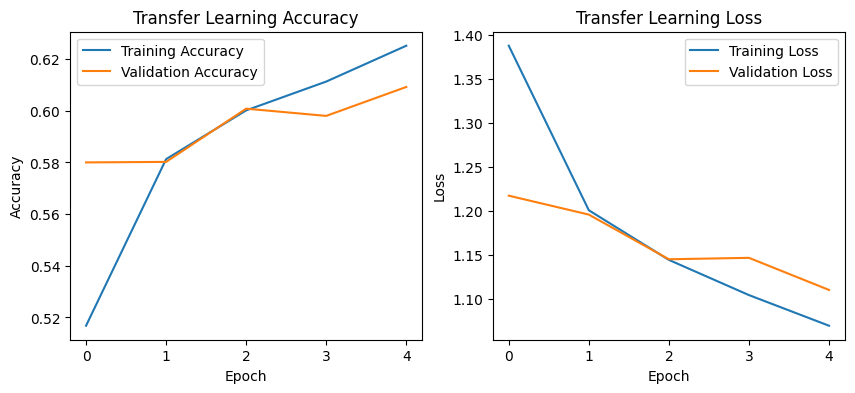

In [ ]:
from tensorflow.keras.applications import VGG16

# 1. Memuat base model VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# 2. Membekukan lapisan konvolusi
base_model.trainable = False

# 3. Membuat model baru dengan menambahkan classifier kita di atas base_model
model_tl = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 4. Kompilasi model
model_tl.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

# 5. Melatih model (hanya melatih lapisan Dense yang baru)
print("Melatih model dengan Transfer Learning...")
history_tl = model_tl.fit(x_train_c, y_train_c, epochs=5, validation_split=0.1)
print("Pelatihan selesai.")

# 6. Plot history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_tl.history['accuracy'], label='Training Accuracy')
plt.plot(history_tl.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_tl.history['loss'], label='Training Loss')
plt.plot(history_tl.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

tugas kecil

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Melatih model dengan Transfer Learning...
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 616s 436ms/step - accuracy: 0.4589 - loss: 1.5466 - val_accuracy: 0.5628 - val_loss: 1.2234
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 640s 455ms/step - accuracy: 0.5772 - loss: 1.2075 - val_accuracy: 0.5876 - val_loss: 1.1618
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 673s 449ms/step - accuracy: 0.6018 - loss: 1.1372 - val_accuracy: 0.6034 - val_loss: 1.1468
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 632s 449ms/step - accuracy: 0.6136 - loss: 1.1016 - val_accuracy: 0.6024 - val_loss: 1.1299
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 681s 449ms/step - accuracy: 0.6299 - loss: 1.0653 - val_accuracy: 0.6074 - val_loss: 1.1106
Pelatihan selesai.


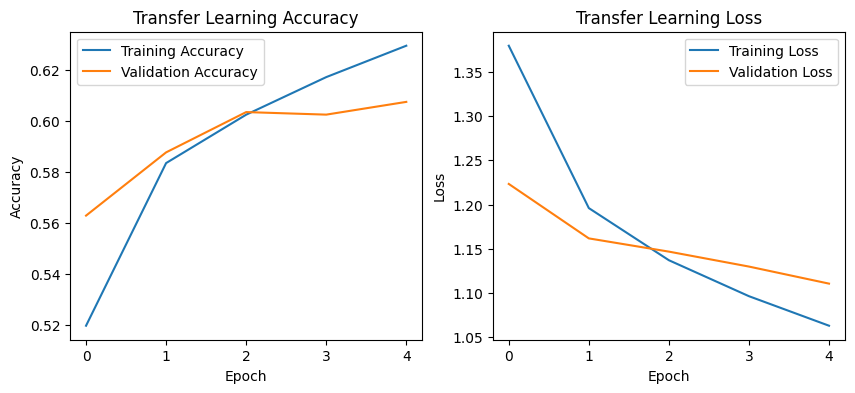

In [ ]:
from tensorflow.keras.applications import VGG16

# 1. Memuat base model VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# 2. Membekukan lapisan konvolusi
base_model.trainable = False

# 3. Membuat model baru dengan menambahkan classifier kita di atas base_model
model_tl = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 4. Kompilasi model
model_tl.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

# 5. Melatih model (hanya melatih lapisan Dense yang baru)
print("Melatih model dengan Transfer Learning...")
history_tl = model_tl.fit(x_train_c, y_train_c, epochs=5, validation_split=0.1)
print("Pelatihan selesai.")

# 6. Plot history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_tl.history['accuracy'], label='Training Accuracy')
plt.plot(history_tl.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_tl.history['loss'], label='Training Loss')
plt.plot(history_tl.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Praktikum 6

Membuat prediksi untuk evaluasi...
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.81      0.74      1000
           1       0.88      0.73      0.80      1000
           2       0.63      0.52      0.57      1000
           3       0.48      0.56      0.52      1000
           4       0.67      0.56      0.61      1000
           5       0.55      0.65      0.59      1000
           6       0.79      0.75      0.77      1000
           7       0.72      0.74      0.73      1000
           8       0.82      0.75      0.79      1000
           9       0.75      0.81      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000


Confusion Matrix:


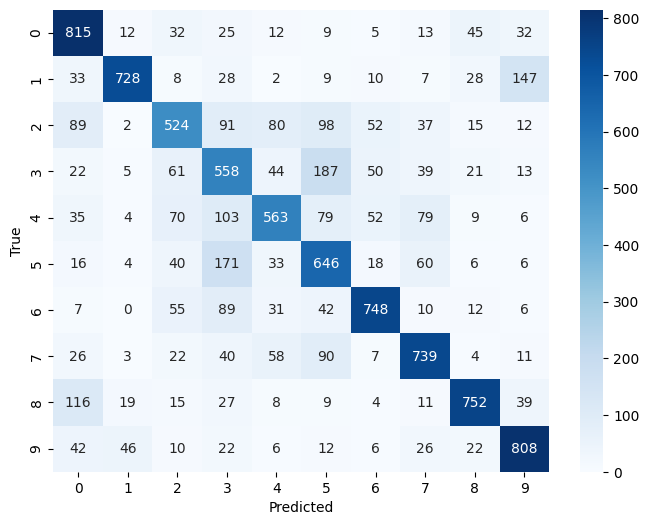

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Menggunakan model_cifar dari D4 untuk evaluasi
print("Membuat prediksi untuk evaluasi...")
y_pred_c = model_cifar.predict(x_test_c).argmax(axis=1)

# Laporan Klasifikasi (Precision, Recall, F1-Score)
print("Classification Report:")
print(classification_report(y_test_c, y_pred_c))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test_c, y_pred_c)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()